In [17]:
import pandas as pd
import re
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

data_dir = Path('data')
episode_files = sorted(data_dir.glob('reddit_episode_*.csv'))

In [20]:
episode_stats = []

"""
Performance metrics:
- num_engagement = number of posts + number of comments
- homogeneity_score = score / num_posts

explanation:
- engagement metric shows how many posts are being made
- homogeneity_score is a score which shows whether audience opinions are homogenous
    - plot with standard deviation
"""

for file_path in episode_files:
    # Extract episode number from filename (e.g., reddit_episode_1.csv -> 1)
    match = re.search(r'reddit_episode_(\d+)\.csv', file_path.name)
    if match:
        episode_number = int(match.group(1))
        df = pd.read_csv(file_path)
        
        num_posts = len(df)
        num_comments = df['num_comments'].sum() if 'num_comments' in df.columns else 0
        score = df['score'].sum() if 'score' in df.columns else 0
        score_vec = df['score'].values if 'score' in df.columns else np.array([0])

        num_engagement = num_posts + num_comments
        homogeneity_score = score / num_posts if num_posts > 0 else 0
        # Standard deviation of individual post scores
        homogeneity_score_sd = np.std(score_vec / num_posts) if len(score_vec) > 0 else 0
        
        episode_stats.append({
            'episode_number': episode_number,
            'num_engagement': num_engagement,
            'homogeneity_score': homogeneity_score,
            'homogeneity_score_sd': homogeneity_score_sd
        })

episode_analytics = pd.DataFrame(episode_stats)
episode_analytics = episode_analytics.sort_values('episode_number').reset_index(drop=True)

episode_analytics

,episode_number,num_engagement,homogeneity_score,homogeneity_score_sd
0,1,283,39.000000,0.000000
1,2,261,15.000000,0.000000
2,3,323,82.666667,33.854080
3,4,520,38.666667,4.745079
4,5,298,29.500000,0.250000
5,6,456,16.666667,2.439389
6,7,588,135.400000,29.961469
7,8,426,39.666667,5.864730
8,9,367,21.000000,0.000000
9,10,419,17.000000,0.000000


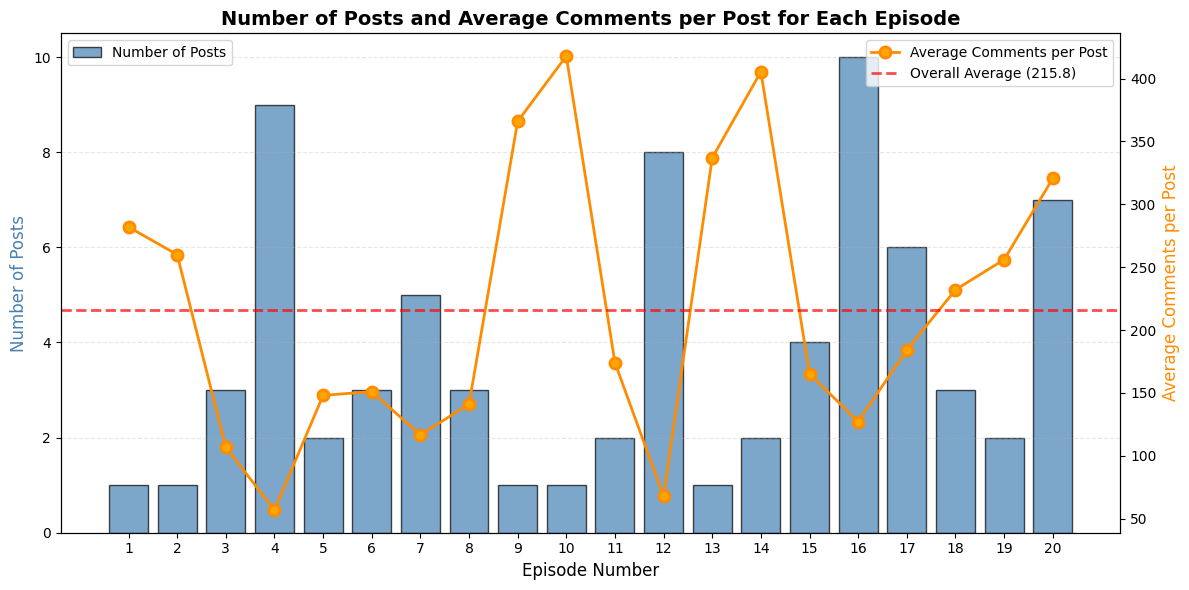

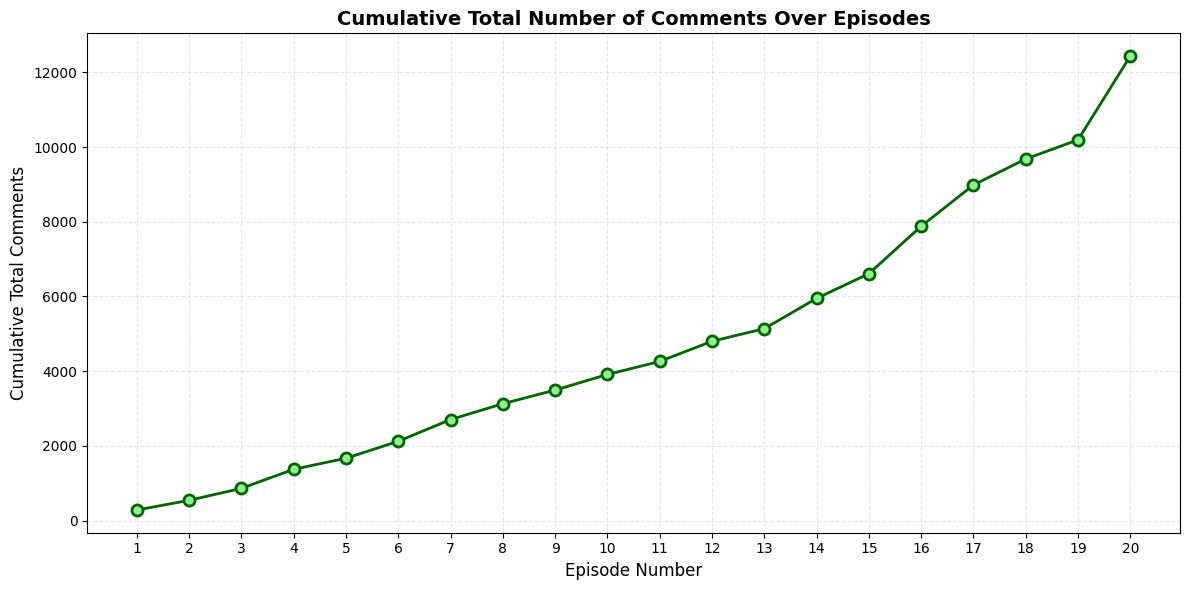

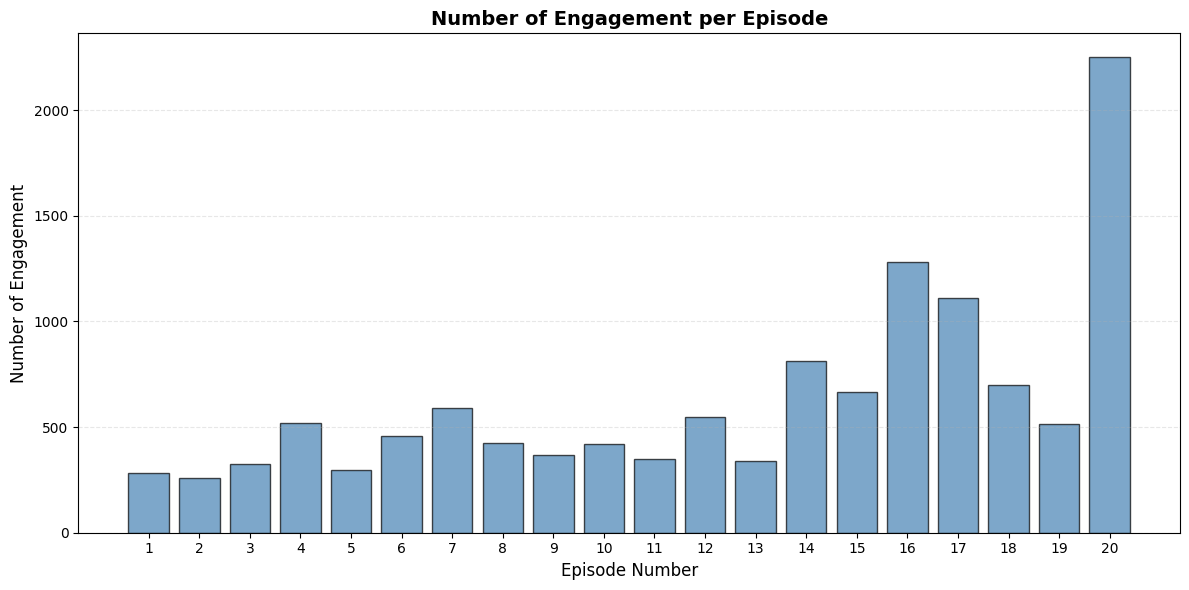

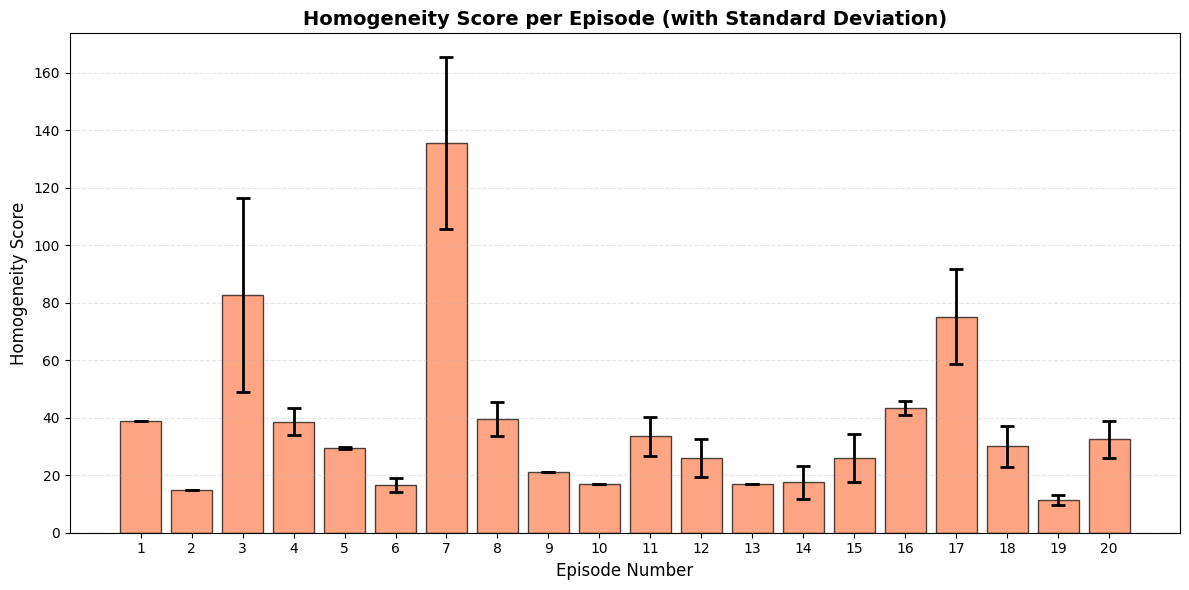

In [21]:
# Set style for better-looking plots
plt.style.use('default')
fig_size = (12, 6)

# 1. Bar chart: Number of engagement per episode
plt.figure(figsize=fig_size)
plt.bar(episode_analytics['episode_number'], episode_analytics['num_engagement'], 
        color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Episode Number', fontsize=12)
plt.ylabel('Number of Engagement', fontsize=12)
plt.title('Number of Engagement per Episode', fontsize=14, fontweight='bold')
plt.xticks(episode_analytics['episode_number'])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 2. Bar chart: Homogeneity score per episode with standard deviation error bars
plt.figure(figsize=fig_size)
bars = plt.bar(episode_analytics['episode_number'], episode_analytics['homogeneity_score'], 
               color='coral', edgecolor='black', alpha=0.7, 
               yerr=episode_analytics['homogeneity_score_sd'], capsize=5, 
               error_kw={'elinewidth': 2, 'capthick': 2})
plt.xlabel('Episode Number', fontsize=12)
plt.ylabel('Homogeneity Score', fontsize=12)
plt.title('Homogeneity Score per Episode (with Standard Deviation)', fontsize=14, fontweight='bold')
plt.xticks(episode_analytics['episode_number'])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

